#                                                **python implementation**

In [ ]:
!conda install -c conda-forge ydata-profiling -y

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lenovo\anaconda3

  added / updated specs:
    - ydata-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.10.5  |       h4c7d964_0         153 KB  conda-forge
    certifi-2025.10.5          |     pyhd8ed1ab_0         156 KB  conda-forge
    conda-24.11.3              |  py312h2e8e312_0         1.1 MB  conda-forge
    dacite-1.9.2               |     pyhd8ed1ab_0          21 KB  conda-forge
    dataclasses-0.8            |     pyhc8e2a94_3          10 KB  conda-forge
    filetype-1.2.0             |     pyhd8ed1ab_0          20 KB  conda-forge
    imagehash-4.3.1            |     pyhd8ed1ab_1         286 KB  conda-forge
    libexpat-2.6.3             |       he0c23c2_0         136 KB  cond

In [209]:
import pickle   # importing pickle for saving and loading machine learning models
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data
from preprocess1 import *  # importing * for import all functions at once
#from myfolder.preprocess1 import *

from imblearn.over_sampling import SMOTE  # importing SMOTE for Balancing the Data

In [210]:
df=pd.read_csv("loan_approved.csv")  # Loading dataset

In [211]:
df.columns  # Checking coloums of datasets

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

# EDA

In [212]:
data1=df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']] #Categorical data
data2=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] #Numerical Data

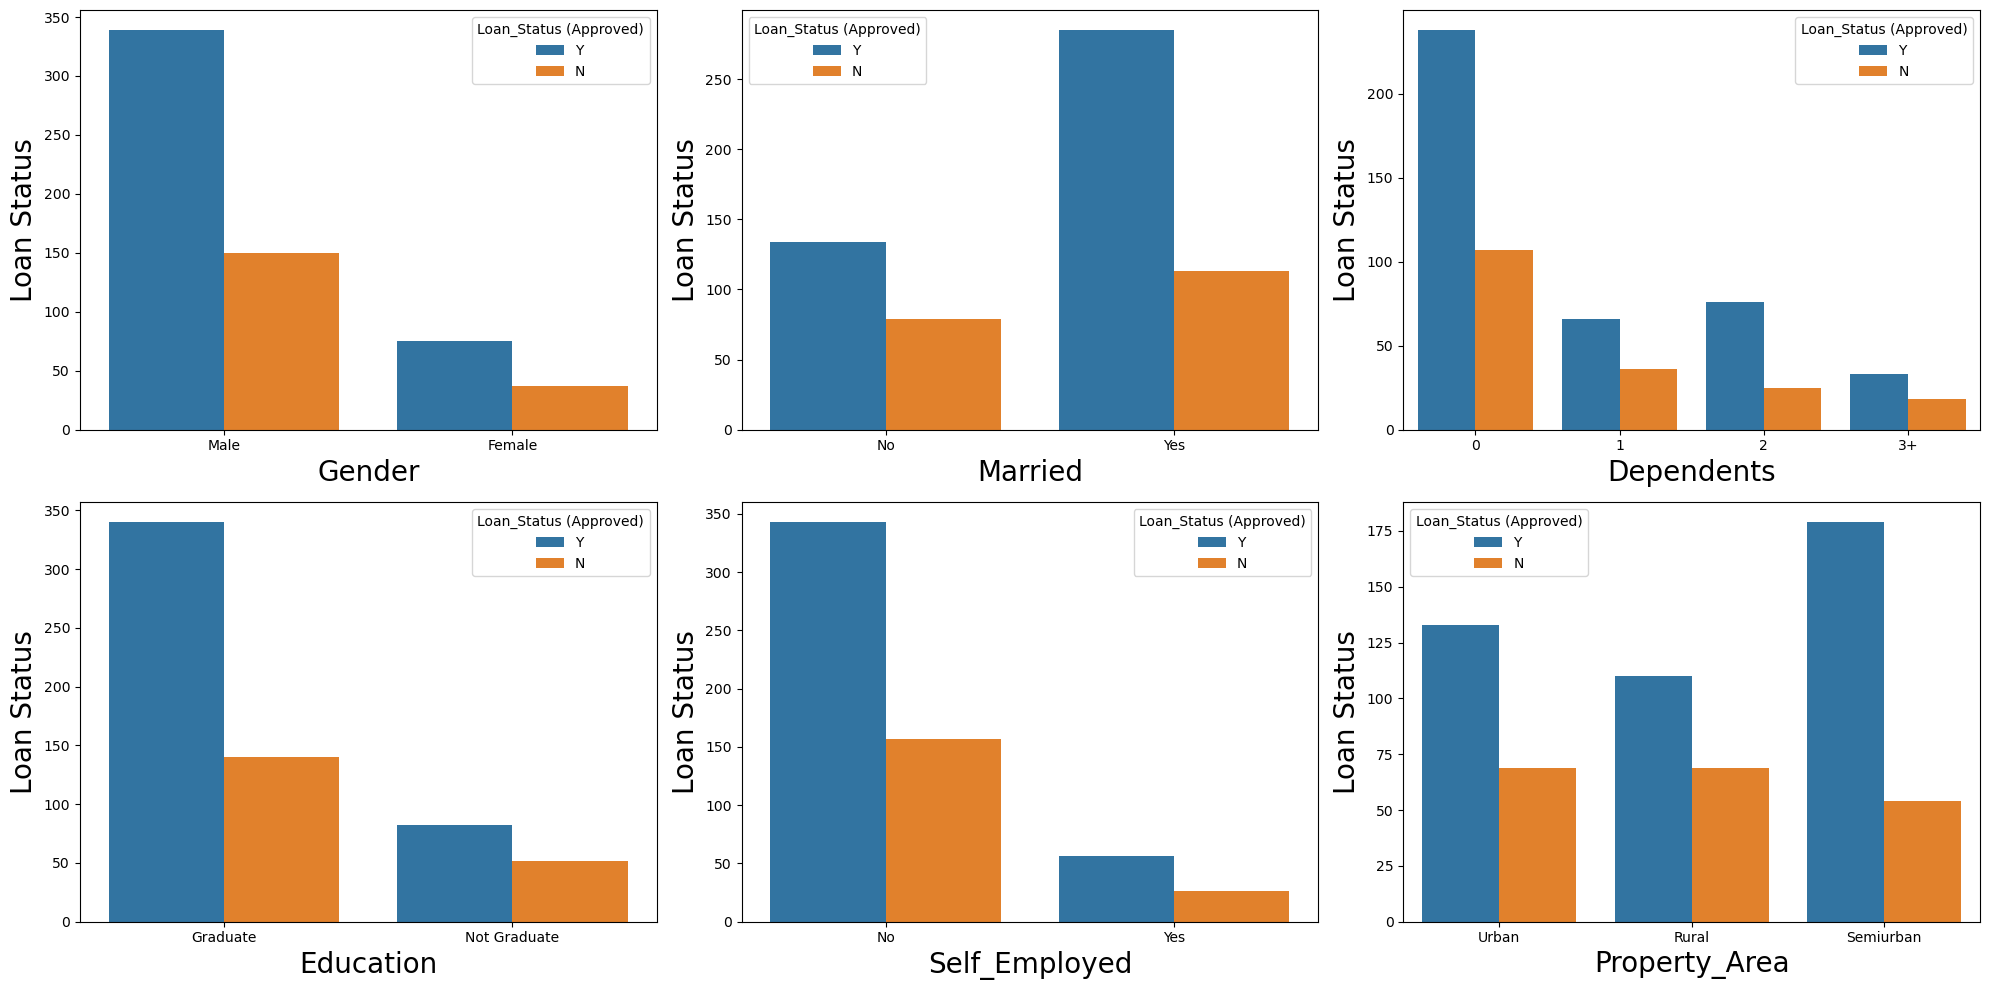

In [213]:
plt.figure(figsize=(20,10))#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    plt.subplot(2,3,plotnumber)
    sns.countplot(x=data1[column],hue=df['Loan_Status (Approved)'])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

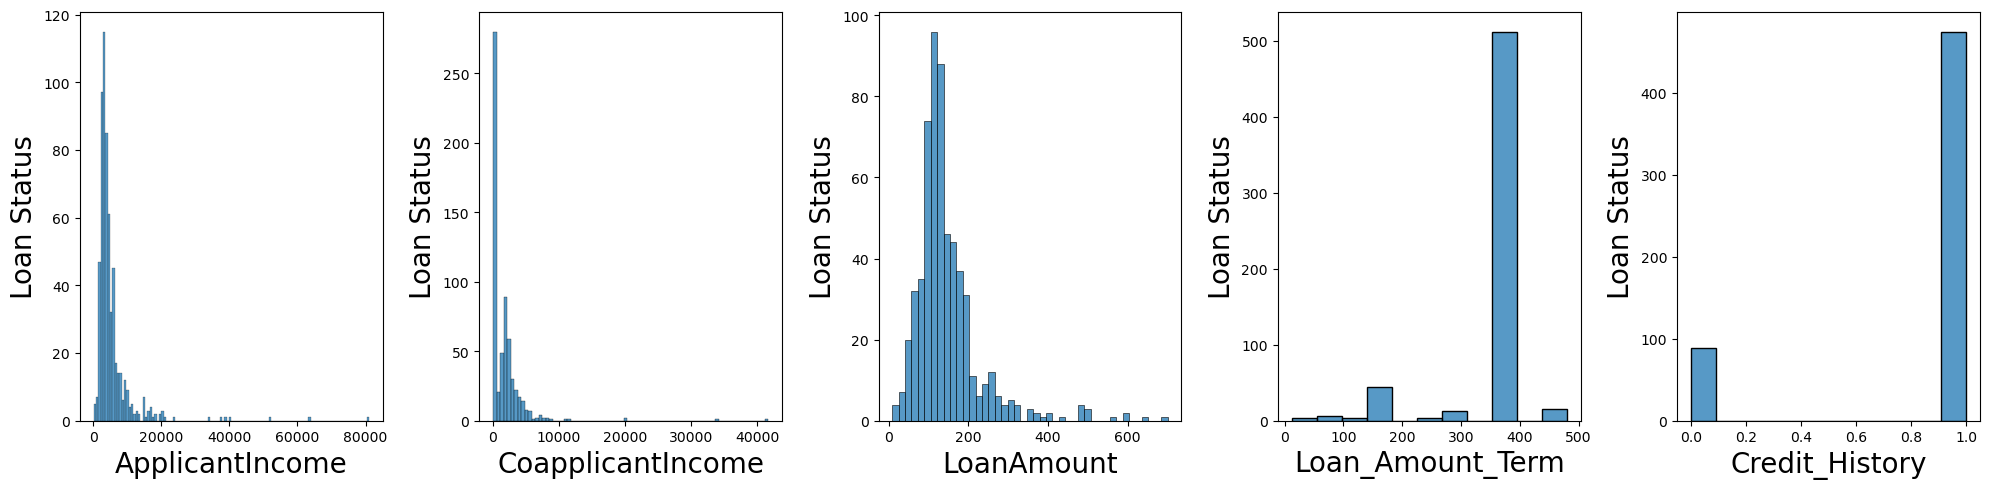

In [214]:
plt.figure(figsize=(20,5))#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    ax = plt.subplot(1,5,plotnumber)
    sns.histplot(x=data2[column])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

## Data Preprocessing Pipeline -Feature Engineering

### 1.Check the missing values

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [216]:
df.isnull().sum()  # Checking null values

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [217]:
## How much values have been missed
df["Gender"].isnull().sum()/614*100
#There are around 2.11% of data is null in Gender Column

2.1172638436482085

# Imputing Null values

In [218]:
df.loc[df['Gender'].isnull(),'Gender']="Male"  # Filling null value using Most_Frequent Elements of Gender column.

In [219]:
df.loc[df['Married'].isnull(),'Married']="Yes"    # Filling null value using Most_Frequent Elements of Married column.

In [220]:
df.loc[df['Dependents'].isnull(),'Dependents']='0'   # Filling null value using Most_Frequent Elements of Dependents

In [221]:
df.loc[df['Self_Employed'].isnull(),'Self_Employed']='No'   # Filling null value using Most_Frequent Elements of Self_Employed

In [222]:
#  Filling null values using Median of LoanAmount
df.loc[df['LoanAmount'].isnull(),'LoanAmount']=df['LoanAmount'].median()

In [223]:
#  Filling null values using Most_Frequent value of Loan_Amount_Term column
df.loc[df['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=360.0

In [224]:
df.loc[df['Credit_History'].isnull(),'Credit_History']=0.0    # Filling null values of Credit_History

In [225]:
df.isnull().sum()   # Checking null values are available or not

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [226]:
## renaming the target column
df.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

## Step 2 Handling the categorical data

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [228]:
data1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [229]:
data1["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [230]:
data1["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [231]:
data1["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [232]:
data1["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [233]:
data1["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [234]:
data1["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [235]:
data1.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [236]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder() #Object Creation

data1.Gender=lc.fit_transform(data1.Gender)

In [237]:
df.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### One hot encoding -OHE Method

In [239]:
pd.get_dummies(df['Gender'],prefix='Gender',dtype=int)

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [240]:
df1=pd.get_dummies(df['Gender'],prefix='Gender',dtype=int)
df=pd.concat([df,df1],axis=1).drop(['Gender'],axis=1)

In [241]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [242]:
df1=pd.get_dummies(df['Married'],prefix='Married',dtype=int)
df=pd.concat([df,df1],axis=1).drop(['Married'],axis=1)

In [243]:
df1=pd.get_dummies(df['Property_Area'],prefix='Property_Area',drop_first=True,dtype=int)
df=pd.concat([df,df1],axis=1).drop(['Property_Area'],axis=1)

In [244]:
df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,0,1
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,0,0
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,0,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,0,1


In [245]:
df1=pd.get_dummies(df['Dependents'],prefix='Dependents',drop_first=True,dtype=int)
df=pd.concat([df,df1],axis=1).drop(['Dependents'],axis=1)

In [246]:
df1=pd.get_dummies(df['Self_Employed'],prefix='Self_Employed',dtype=int)
df=pd.concat([df,df1],axis=1).drop(['Self_Employed'],axis=1)

In [247]:
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})
#Task: What is the difference between map and Replace Function

In [248]:
df1=pd.get_dummies(df['Education'],prefix='Education',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Education'],axis=1)

In [249]:
df.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Female            614 non-null    int32  
 8   Gender_Male              614 non-null    int32  
 9   Married_No               614 non-null    int32  
 10  Married_Yes              614 non-null    int32  
 11  Property_Area_Semiurban  614 non-null    int32  
 12  Property_Area_Urban      614 non-null    int32  
 13  Dependents_1             614 non-null    int32  
 14  Dependents_2             6

## 3.scaling data

In [251]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Education_Not Graduate
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,0,0,0,1,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,0


In [252]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [253]:
## scaling data
df["Loan_Amount_Term"] = df["Loan_Amount_Term"]/12

In [254]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
30.0    526
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: count, dtype: int64

In [255]:
## scaling data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #Object Creation
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(df[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

In [256]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Education_Not Graduate
0,LP001002,0.072991,-0.554487,-0.211241,30.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,0
1,LP001003,-0.134412,-0.038732,-0.211241,30.0,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,LP001005,-0.393747,-0.554487,-0.948996,30.0,1.0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,LP001006,-0.462062,0.251980,-0.306435,30.0,1.0,1,0,1,0,1,0,1,0,0,0,1,0,1
4,LP001008,0.097728,-0.554487,-0.056551,30.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-0.410130,-0.554487,-0.889500,30.0,1.0,1,1,0,1,0,0,0,0,0,0,1,0,0
610,LP002979,-0.212557,-0.554487,-1.258378,15.0,1.0,1,0,1,0,1,0,0,0,0,1,1,0,0
611,LP002983,0.437174,-0.472404,1.276168,30.0,1.0,1,0,1,0,1,0,1,1,0,0,1,0,0
612,LP002984,0.357064,-0.554487,0.490816,30.0,1.0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [257]:
## checking the duplicate rows
#data.duplicate()
df.duplicated().sum()

0

In [258]:
## Saving the preprocessed data.
df.to_csv('Preprocessed_data.csv',index=False)

In [259]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
preprocessed_data=pd.read_csv('Preprocessed_data.csv')

In [261]:
preprocessed_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Education_Not Graduate
0,LP001002,0.072991,-0.554487,-0.211241,30.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,0
1,LP001003,-0.134412,-0.038732,-0.211241,30.0,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,LP001005,-0.393747,-0.554487,-0.948996,30.0,1.0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,LP001006,-0.462062,0.251980,-0.306435,30.0,1.0,1,0,1,0,1,0,1,0,0,0,1,0,1
4,LP001008,0.097728,-0.554487,-0.056551,30.0,1.0,1,0,1,1,0,0,1,0,0,0,1,0,0


## 4.Feature Selection

In [262]:
# Removing redundant columns
#We can drop loan id.  
preprocessed_data.drop('Loan_ID',axis=1,inplace=True)

In [263]:
preprocessed_data.drop(["Gender_Male","Married_Yes","Self_Employed_Yes"],axis=1,inplace=True)

In [264]:
preprocessed_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Education_Not Graduate
0,0.072991,-0.554487,-0.211241,30.0,1.0,1,0,1,0,1,0,0,0,1,0
1,-0.134412,-0.038732,-0.211241,30.0,1.0,0,0,0,0,0,1,0,0,1,0
2,-0.393747,-0.554487,-0.948996,30.0,1.0,1,0,0,0,1,0,0,0,0,0
3,-0.462062,0.251980,-0.306435,30.0,1.0,1,0,0,0,1,0,0,0,1,1
4,0.097728,-0.554487,-0.056551,30.0,1.0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,30.0,1.0,1,1,1,0,0,0,0,0,1,0
610,-0.212557,-0.554487,-1.258378,15.0,1.0,1,0,0,0,0,0,0,1,1,0
611,0.437174,-0.472404,1.276168,30.0,1.0,1,0,0,0,1,1,0,0,1,0
612,0.357064,-0.554487,0.490816,30.0,1.0,1,0,0,0,1,0,1,0,1,0


<Axes: >

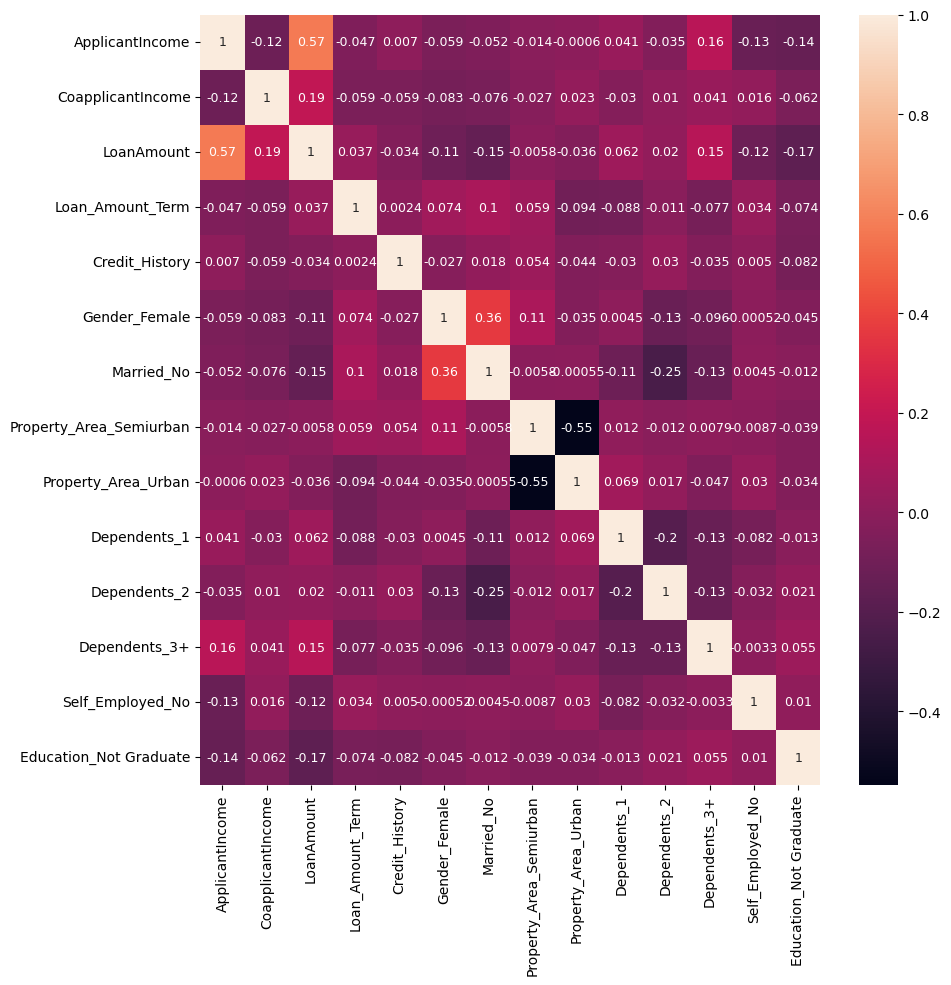

In [265]:
## checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(preprocessed_data.drop("Loan_Status",axis=1).corr(),annot=True,annot_kws={"size": 9})

In [266]:
preprocessed_data.shape

(614, 15)

# Model Creation

In [267]:
preprocessed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Education_Not Graduate
0,0.072991,-0.554487,-0.211241,30.0,1.0,1,0,1,0,1,0,0,0,1,0
1,-0.134412,-0.038732,-0.211241,30.0,1.0,0,0,0,0,0,1,0,0,1,0
2,-0.393747,-0.554487,-0.948996,30.0,1.0,1,0,0,0,1,0,0,0,0,0
3,-0.462062,0.251980,-0.306435,30.0,1.0,1,0,0,0,1,0,0,0,1,1
4,0.097728,-0.554487,-0.056551,30.0,1.0,1,0,1,0,1,0,0,0,1,0


In [268]:
## defining X and y
X = preprocessed_data.drop("Loan_Status",axis=1) #Independent variable
y = preprocessed_data.Loan_Status #Dependent Variable

In [269]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Education_Not Graduate
0,0.072991,-0.554487,-0.211241,30.0,1.0,0,1,0,1,0,0,0,1,0
1,-0.134412,-0.038732,-0.211241,30.0,1.0,0,0,0,0,1,0,0,1,0
2,-0.393747,-0.554487,-0.948996,30.0,1.0,0,0,0,1,0,0,0,0,0
3,-0.462062,0.251980,-0.306435,30.0,1.0,0,0,0,1,0,0,0,1,1
4,0.097728,-0.554487,-0.056551,30.0,1.0,0,1,0,1,0,0,0,1,0


In [270]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42)

In [271]:
y_train.value_counts()

Loan_Status
1    322
0    138
Name: count, dtype: int64

In [272]:
# Install imblearn package - 
# pip install -U imbalanced-learn   #Run in Anaconda Prompt and Restart Notebook

### SMOTE Technique-To Balance the data

In [273]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() #Object

In [274]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [275]:
y_smote.value_counts()

Loan_Status
1    322
0    322
Name: count, dtype: int64

In [276]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote) #Training 

SVC()

In [277]:
y_hat=svclassifier.predict(X_test)

In [278]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [279]:
## Evaluating the model created
## Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))#Actual and Prediction

              precision    recall  f1-score   support

           0       0.36      0.07      0.12        54
           1       0.65      0.93      0.77       100

    accuracy                           0.63       154
   macro avg       0.51      0.50      0.44       154
weighted avg       0.55      0.63      0.54       154



## Hyper Parameters for SVM

In [288]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [1, 5, 10,30,60,70,80], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
# Always take a lower value of gamma.
SVCmodel=SVC()
grid = GridSearchCV(SVCmodel, param_grid,verbose = 3,scoring='f1',cv=3)
# verbose-Controls how much information is printed while GridSearch runs.
# scoring='f1' Tells GridSearchCV how to measure performance.
# cv = 3  This is cross-validation folds = 3

| Argument       | Meaning                     | Example Here              |
| -------------- | --------------------------- | ------------------------- |
| `SVCmodel`     | Model to tune               | `SVC()`                   |
| `param_grid`   | Values to test              | C and gamma list          |
| `verbose=3`    | Show progress messages      | Detailed training info    |
| `scoring='f1'` | Use F1-score for evaluation | Good for imbalanced data  |
| `cv=3`         | 3-fold cross-validation     | 3 training/testing splits |


In [281]:
# fitting the model for grid search
grid.fit(X,y)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV 1/3] END ......................C=1, gamma=1;, score=0.828 total time=   0.0s
[CV 2/3] END ......................C=1, gamma=1;, score=0.814 total time=   0.0s
[CV 3/3] END ......................C=1, gamma=1;, score=0.829 total time=   0.0s
[CV 1/3] END ....................C=1, gamma=0.1;, score=0.851 total time=   0.0s
[CV 2/3] END ....................C=1, gamma=0.1;, score=0.824 total time=   0.0s
[CV 3/3] END ....................C=1, gamma=0.1;, score=0.832 total time=   0.0s
[CV 1/3] END ...................C=1, gamma=0.01;, score=0.815 total time=   0.0s
[CV 2/3] END ...................C=1, gamma=0.01;, score=0.815 total time=   0.0s
[CV 3/3] END ...................C=1, gamma=0.01;, score=0.809 total time=   0.0s
[CV 1/3] END ..................C=1, gamma=0.001;, score=0.815 total time=   0.0s
[CV 2/3] END ..................C=1, gamma=0.001;, score=0.815 total time=   0.0s
[CV 3/3] END ..................C=1, gamma=0.001

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 30, 60, 70, 80],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [282]:
# print best parameter after tuning
print("Best Parameters of C & Gamma are:",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("Best Score we can get is:",grid.best_score_)

Best Parameters of C & Gamma are: {'C': 30, 'gamma': 0.001}
Best Score we can get is: 0.8443116731029097


In [283]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=30, gamma=0.001,random_state=42) #Model Creation

In [284]:
clf.fit(X_smote, y_smote)

SVC(C=30, gamma=0.001, random_state=42)

In [285]:
y_clf=clf.predict(X_test)

In [286]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61        54
           1       0.78      0.86      0.82       100

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



---
---

In [ ]:
## Cross Validation
scores_after = cross_val_score(clf,X,y,cv=10,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())